# Introduction to Machine Learning
### Andreas Mueller and Sarah Guido (2017) O'Reilly
## Ch. 2 Supervised Learning

# Support Vector Machines (SVM)
## Understanding SVMs
During Training:
* SVM learns how important each of data points in train set is to represent the decision boundary between two classes
* Subset of data points on the border between classes (i.e., "support vectors") are used to define the decision boundary

### Making a Prediction
* To make prediction for new point, distance to each of the support vectors is measured
* Classification decision is based on distances to the support vectors, and importance of support vectors learned in training. 

### Gaussian kernel
* Measure of the distance between data points
* || x1 - x2 || denotes Euclidean distance
* gamma parameter controls width of Gaussian kernel

#### Import standard packages

In [1]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Support Vector Classifier (SVC)

In [2]:
from sklearn.svm import SVC

### Plot decision boundary and support vectors
* SVC with RBF kernel produces smooth (nonlinear) boundary
* Parameters: C and gamma 
* Support vectors are larger symbols in bold on boundary

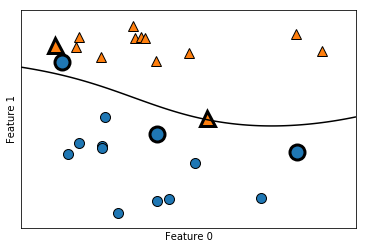

In [3]:
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by sign of dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Tuning SVM Parameters

### Gamma
* Controls width of Gaussian kernel
* Determines scale of what is close for points near to each other\

### Regularization parameter: C
* Limits the importance of each point (via `dual_coef`)

### Visualization of SVM parameters
* Plot decision boundaries and support vectors 
* Different settings of parameters C and gamma

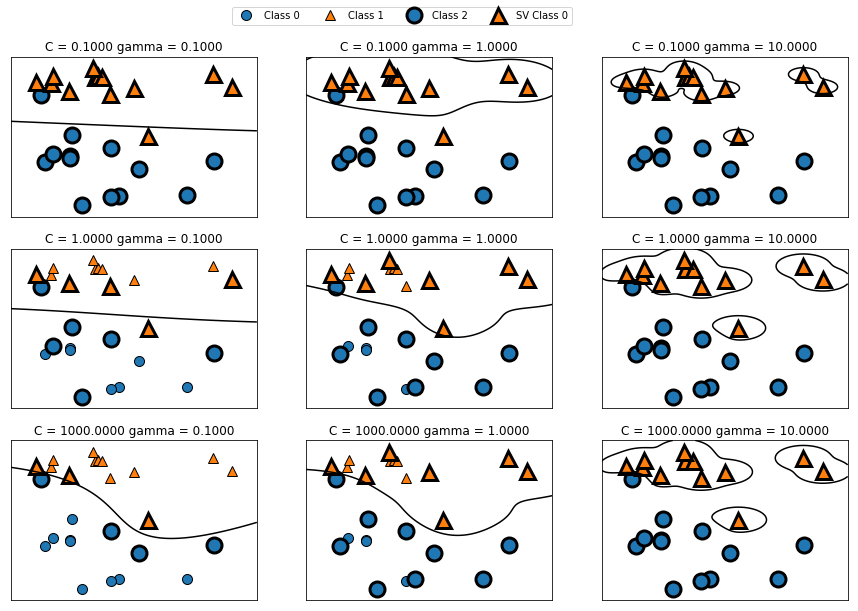

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["Class 0", "Class 1", "Class 2", 
                  "SV Class 0", "SV Class 1"],
                 ncol=4, loc=(0.9, 1.2))

### Effect of Gamma parameter (left to right)
* Small gamma means large radius of Guassian kernel, many points considered as close
* Low gamma: decision boundary will vary slowly, model of low complexity
* High gamma: yeilds more complex model, focusing more on single points

### Effect of Regularization parameter C (top to bottom)
* Small C means very restricted model, limited influence of individual data points
* Increasing value of C allows individual points to have greatre influence on model
* High value of C bends decision boundary to correctly classify individual data points

## SupportVectorClassifier: Breast Cancer Data
* Load data, split dataset into Train set and Test set
* Apply RBF kernel, default parameters: C = 1, gamma = 1/n_features
* Evaluate model accuracy on Test set

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [11]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
print("Accurary on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy Test set: {:.3f}".format(svc.score(X_test, y_test)))

Accurary on Training set: 1.000
Accuracy Test set: 0.629


### Model Overfitting
* Model is overfit with default settings
* SVC is very sensitive to parameter settings and scaling of data

## Scaling of Data
* Plot minimum and maximum values for each feature
* Features in cancer data are measured on completely different scales
* Devastating effect for the kernel of SVM

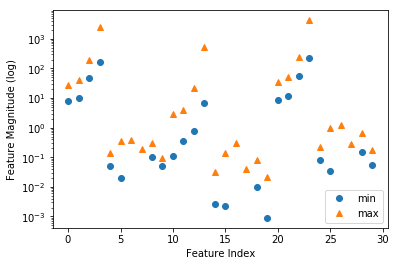

In [14]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude (log)")
plt.yscale("log")

## Preprocessing : Rescal the data
* Rescale each feature so they are all on approximately same scale 
* Common method for kernel SVM is to scale data so featurs between 0 and 1

In [17]:
# Compute minimum value per feature on Training set
min_on_training = X_train.min(axis=0)

# Compute range of each feature (max - min) on Training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract min, divide by range; then min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [16]:
# use SAME transformation on Test set, using min and range of training set
X_test_scaled = (X_test - min_on_training) / range_on_training

### Run SVC on Rescaled data

In [23]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accurary on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accurary on Training set: 0.955
Accuracy Test set: 0.951


### Adjust Parameters
* Scaling data improved accuracy, but model is now underfit
* Try increasing value of C or gamma to fit more complex model
* Increasing value of C improves model accuracy to 97%

In [25]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accurary on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accurary on Training set: 0.993
Accuracy Test set: 0.972


## Strengths, limitations, and parameters
* SVMs allow for complex decision boundaries, with high-dimentionsl or low-dimensional data
* SVMs do not scale well with number of samples
* SVMs require careful preprocessing (scaling) of data and tuning of parameters. 
* SVM models can be hard to inspect, difficult to understand why prediction was made, tricky to explain to non-expert
